**DATA IMPORTING AND PREPROCESSING**

In [ ]:
import pandas as pd


In [ ]:
from google.colab import drive

In [ ]:
weather = pd.read_csv("2948764.csv", index_col="DATE")

In [ ]:
weather

,STATION,NAME,MDPR,PRCP,SNWD,TAVG,TMAX,TMIN,WDFG,WSFG
DATE,,,,,,,,,,
2000-01-01,CA006131983,"DELHI CS, ON CA",NaN,0.06,NaN,NaN,45.0,28.0,NaN,NaN
2000-01-02,CA006131983,"DELHI CS, ON CA",NaN,0.10,NaN,NaN,55.0,29.0,NaN,NaN
2000-01-03,CA006131983,"DELHI CS, ON CA",NaN,0.35,NaN,NaN,55.0,32.0,NaN,NaN
2000-01-04,CA006131983,"DELHI CS, ON CA",NaN,0.00,NaN,NaN,47.0,32.0,NaN,NaN
2000-01-05,CA006131983,"DELHI CS, ON CA",NaN,0.00,NaN,NaN,30.0,24.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2022-04-12,CA006131983,"DELHI CS, ON CA",NaN,0.01,NaN,51.0,65.0,37.0,NaN,NaN
2022-04-13,CA006131983,"DELHI CS, ON CA",NaN,0.17,NaN,60.0,71.0,49.0,21.0,96.2
2022-04-14,CA006131983,"DELHI CS, ON CA",NaN,0.00,NaN,51.0,60.0,42.0,25.0,105.1


weather.loc["01-01-2020":"31-01-2020",:]

In [ ]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
MDPR       0.999876
PRCP       0.027953
SNWD       0.607297
TAVG       0.104020
TMAX       0.020656
TMIN       0.020779
WDFG       0.778850
WSFG       0.778850
dtype: float64

In [ ]:
core_weather = weather[['PRCP', 'TAVG', 'TMAX', 'TMIN', 'SNWD', 'WDFG', 'WSFG']].copy()

In [ ]:
core_weather.columns = ["prcep", "temp_avg", "temp_max", "temp_min", 'snow_depth', 'wind_gust', 'wind_speed'] 

In [ ]:
core_weather

,prcep,temp_avg,temp_max,temp_min,snow_depth,wind_gust,wind_speed
DATE,,,,,,,
2000-01-01,0.06,NaN,45.0,28.0,NaN,NaN,NaN
2000-01-02,0.10,NaN,55.0,29.0,NaN,NaN,NaN
2000-01-03,0.35,NaN,55.0,32.0,NaN,NaN,NaN
2000-01-04,0.00,NaN,47.0,32.0,NaN,NaN,NaN
2000-01-05,0.00,NaN,30.0,24.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2022-04-12,0.01,51.0,65.0,37.0,NaN,NaN,NaN
2022-04-13,0.17,60.0,71.0,49.0,NaN,21.0,96.2
2022-04-14,0.00,51.0,60.0,42.0,NaN,25.0,105.1


In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

prcep         0.027953
temp_avg      0.104020
temp_max      0.020656
temp_min      0.020779
snow_depth    0.607297
wind_gust     0.778850
wind_speed    0.778850
dtype: float64

In [ ]:
core_weather["snow_depth"].value_counts()

0.0     1916
0.4      236
0.8       72
3.1       67
1.2       67
1.6       65
2.0       64
3.5       64
2.8       59
3.9       54
2.4       48
4.3       46
4.7       42
6.7       42
5.1       41
5.9       37
7.1       30
6.3       29
7.5       27
5.5       27
7.9       22
9.4       20
9.8       18
8.3       16
8.7       13
9.1       11
11.4      10
10.2       5
12.2       5
11.0       4
12.6       3
10.6       3
13.8       3
11.8       2
13.0       2
16.9       1
14.2       1
19.3       1
14.6       1
13.4       1
Name: snow_depth, dtype: int64

In [ ]:
del core_weather["snow_depth"]

In [ ]:
core_weather["wind_gust"].value_counts()

0.0     599
31.0    113
23.0    108
21.0     84
32.0     80
24.0     70
30.0     68
22.0     68
25.0     67
20.0     59
33.0     59
26.0     50
28.0     49
27.0     47
34.0     46
29.0     42
19.0     26
35.0     23
17.0     15
18.0     14
36.0     10
16.0     10
10.0      8
1.0       7
15.0      7
5.0       7
6.0       7
7.0       6
2.0       6
8.0       6
11.0      5
12.0      5
14.0      4
13.0      4
3.0       3
4.0       3
9.0       3
Name: wind_gust, dtype: int64

In [ ]:
del core_weather["wind_gust"]

In [ ]:
core_weather["wind_speed"].value_counts()

0.0      599
71.6     125
78.3     118
73.8     104
82.8      87
91.7      81
96.2      74
87.2      65
98.4      60
102.9     50
80.5      37
76.1      34
107.4     34
69.3      33
85.0      28
120.8     24
94.0      22
100.7     22
111.8     22
105.1     19
116.3     19
89.5      17
125.3     17
114.1     10
127.5      9
136.5      8
109.6      8
132.0      6
118.6      6
138.7      5
149.9      5
145.4      5
134.2      5
123.0      4
161.1      4
129.7      4
140.9      3
156.6      2
154.3      2
147.6      2
172.2      1
158.8      1
143.2      1
165.5      1
167.8      1
152.1      1
174.5      1
243.8      1
201.3      1
Name: wind_speed, dtype: int64

In [ ]:
del core_weather["wind_speed"]

In [ ]:
core_weather[pd.isnull(core_weather["temp_max"])]

,prcep,temp_avg,temp_max,temp_min
DATE,,,,
2000-08-28,0.00,NaN,NaN,NaN
2001-02-28,0.00,NaN,NaN,NaN
2001-10-12,0.36,56.0,NaN,53.0
2001-10-31,0.01,44.0,NaN,NaN
2001-11-12,0.00,38.0,NaN,32.0
...,...,...,...,...
2021-03-22,0.00,45.0,NaN,NaN
2021-03-26,1.15,48.0,NaN,NaN
2021-03-27,0.00,45.0,NaN,NaN


In [ ]:
core_weather = core_weather.fillna(method="ffill")

In [ ]:
core_weather[pd.isnull(core_weather["temp_max"])]

,prcep,temp_avg,temp_max,temp_min
DATE,,,,


In [ ]:
core_weather.apply(pd.isnull).sum()/core_weather.shape[0]

prcep       0.00000
temp_avg    0.07718
temp_max    0.00000
temp_min    0.00000
dtype: float64

In [ ]:
core_weather.dtypes

prcep       float64
temp_avg    float64
temp_max    float64
temp_min    float64
dtype: object

In [ ]:
core_weather.index

Index(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04', '2000-01-05',
       '2000-01-06', '2000-01-07', '2000-01-08', '2000-01-09', '2000-01-10',
       ...
       '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10', '2022-04-11',
       '2022-04-12', '2022-04-13', '2022-04-14', '2022-04-15', '2022-04-16'],
      dtype='object', name='DATE', length=8085)

In [ ]:
core_weather.index = pd.to_datetime(core_weather.index)

In [ ]:
core_weather.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03', '2000-01-04',
               '2000-01-05', '2000-01-06', '2000-01-07', '2000-01-08',
               '2000-01-09', '2000-01-10',
               ...
               '2022-04-07', '2022-04-08', '2022-04-09', '2022-04-10',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-15', '2022-04-16'],
              dtype='datetime64[ns]', name='DATE', length=8085, freq=None)

In [ ]:
core_weather.apply(lambda x: (x==9999).sum())

prcep       0
temp_avg    0
temp_max    0
temp_min    0
dtype: int64

**DATA ANALYSIS**

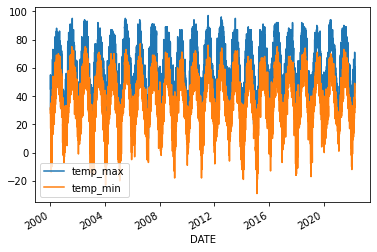

In [ ]:
core_weather[["temp_max", "temp_min"]].plot()

In [ ]:
core_weather.index.year.value_counts().sort_index()

2000    366
2001    365
2002    365
2003    363
2004    366
2005    364
2006    365
2007    365
2008    366
2009    365
2010    364
2011    364
2012    356
2013    365
2014    364
2015    363
2016    366
2017    360
2018    364
2019    360
2020    349
2021    354
2022    106
Name: DATE, dtype: int64

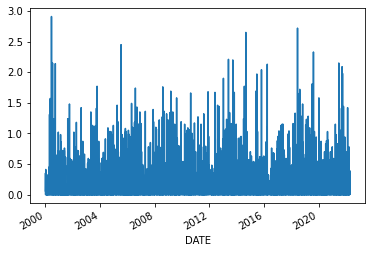

In [ ]:
core_weather["prcep"].plot()

In [ ]:
core_weather.groupby(core_weather.index.year).sum()["prcep"]

DATE
2000    41.75
2001    28.95
2002    30.64
2003    35.63
2004    35.47
2005    38.60
2006    46.10
2007    30.31
2008    49.22
2009    42.76
2010    35.76
2011    43.92
2012    30.63
2013    44.09
2014    37.29
2015    29.88
2016    29.96
2017    37.64
2018    46.11
2019    43.34
2020    35.17
2021    42.56
2022     8.91
Name: prcep, dtype: float64

**DATA TRAINING**

In [ ]:
core_weather["target"]=core_weather.shift(-1)["temp_max"]

In [ ]:
core_weather

,prcep,temp_avg,temp_max,temp_min,target
DATE,,,,,
2000-01-01,0.06,NaN,45.0,28.0,55.0
2000-01-02,0.10,NaN,55.0,29.0,55.0
2000-01-03,0.35,NaN,55.0,32.0,47.0
2000-01-04,0.00,NaN,47.0,32.0,30.0
2000-01-05,0.00,NaN,30.0,24.0,36.0
...,...,...,...,...,...
2022-04-12,0.01,51.0,65.0,37.0,71.0
2022-04-13,0.17,60.0,71.0,49.0,60.0
2022-04-14,0.00,51.0,60.0,42.0,54.0


In [ ]:
core_weather = core_weather.iloc[:-1,:].copy()

In [ ]:
core_weather

,prcep,temp_avg,temp_max,temp_min,target
DATE,,,,,
2000-01-01,0.06,NaN,45.0,28.0,55.0
2000-01-02,0.10,NaN,55.0,29.0,55.0
2000-01-03,0.35,NaN,55.0,32.0,47.0
2000-01-04,0.00,NaN,47.0,32.0,30.0
2000-01-05,0.00,NaN,30.0,24.0,36.0
...,...,...,...,...,...
2022-04-11,0.07,44.0,60.0,29.0,65.0
2022-04-12,0.01,51.0,65.0,37.0,71.0
2022-04-13,0.17,60.0,71.0,49.0,60.0


In [ ]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha=.1)

In [ ]:
predictors = ["prcep", "temp_max", "temp_min"]

In [ ]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [ ]:
train


,prcep,temp_avg,temp_max,temp_min,target
DATE,,,,,
2000-01-01,0.06,NaN,45.0,28.0,55.0
2000-01-02,0.10,NaN,55.0,29.0,55.0
2000-01-03,0.35,NaN,55.0,32.0,47.0
2000-01-04,0.00,NaN,47.0,32.0,30.0
2000-01-05,0.00,NaN,30.0,24.0,36.0
...,...,...,...,...,...
2020-12-27,0.19,33.0,40.0,25.0,42.0
2020-12-28,0.35,34.0,42.0,27.0,28.0
2020-12-29,0.00,24.0,28.0,19.0,42.0


In [ ]:
test


,prcep,temp_avg,temp_max,temp_min,target
DATE,,,,,
2021-01-01,0.04,27.0,34.0,20.0,33.0
2021-01-02,0.78,32.0,33.0,21.0,33.0
2021-01-03,0.13,31.0,33.0,30.0,33.0
2021-01-04,0.00,32.0,33.0,30.0,35.0
2021-01-05,0.00,33.0,35.0,29.0,35.0
...,...,...,...,...,...
2022-04-11,0.07,44.0,60.0,29.0,65.0
2022-04-12,0.01,51.0,65.0,37.0,71.0
2022-04-13,0.17,60.0,71.0,49.0,60.0


In [ ]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [ ]:
predictions = reg.predict(test[predictors])

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(test["target"], predictions)

58.42934990367207

In [ ]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]
combined

,actual,predictions
DATE,,
2021-01-01,33.0,35.788199
2021-01-02,33.0,31.158186
2021-01-03,33.0,35.013638
2021-01-04,35.0,35.680771
2021-01-05,35.0,37.403509
...,...,...
2022-04-11,65.0,59.300452
2022-04-12,71.0,64.521630
2022-04-13,60.0,69.735080


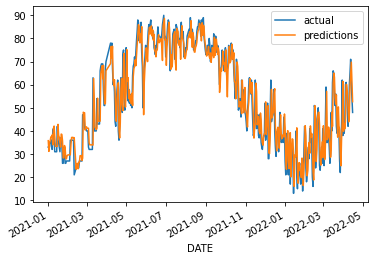

In [ ]:
combined.plot()

In [ ]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [ ]:
combined

,actual,predictions
DATE,,
2021-01-01,33.0,35.788199
2021-01-02,33.0,31.158186
2021-01-03,33.0,35.013638
2021-01-04,35.0,35.680771
2021-01-05,35.0,37.403509
...,...,...
2022-04-11,65.0,59.300452
2022-04-12,71.0,64.521630
2022-04-13,60.0,69.735080


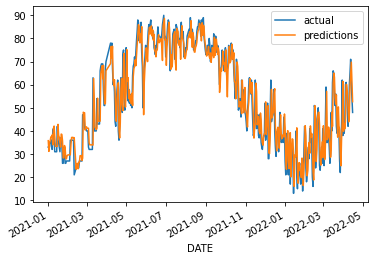

In [ ]:
combined.plot()

In [ ]:
reg.coef_

array([-5.13178608,  0.8902467 ,  0.05775466])

In [ ]:
def create_predictions(predictors, core_weather, reg):
    train = core_weather.loc[:"2020-12-31"]
    test = core_weather.loc["2021-01-01":]

    reg.fit(train[predictors], train["target"])
    predictions = reg.predict(test[predictors])

    error = mean_squared_error(test["target"], predictions)
    
    combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
    combined.columns = ["actual", "predictions"]
    return error, combined

In [ ]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [ ]:
core_weather

,prcep,temp_avg,temp_max,temp_min,target,month_max
DATE,,,,,,
2000-01-01,0.06,NaN,45.0,28.0,55.0,NaN
2000-01-02,0.10,NaN,55.0,29.0,55.0,NaN
2000-01-03,0.35,NaN,55.0,32.0,47.0,NaN
2000-01-04,0.00,NaN,47.0,32.0,30.0,NaN
2000-01-05,0.00,NaN,30.0,24.0,36.0,NaN
...,...,...,...,...,...,...
2022-04-11,0.07,44.0,60.0,29.0,65.0,46.866667
2022-04-12,0.01,51.0,65.0,37.0,71.0,48.033333
2022-04-13,0.17,60.0,71.0,49.0,60.0,48.800000


In [ ]:
predictors = ["prcep", "temp_max", "temp_min"]

error, combined = create_predictions(predictors, core_weather, reg)
error

58.42934990367207

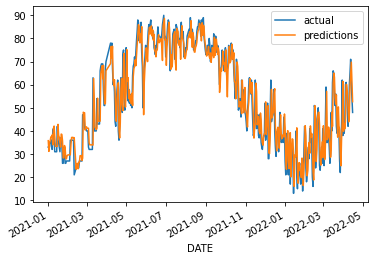

In [ ]:
combined.plot()

In [ ]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [ ]:
error, combined = create_predictions(predictors + ["monthly_avg", "day_of_year_avg"], core_weather, reg)
error

50.44257814633985

In [ ]:
reg.coef_

array([-4.3080227 ,  0.67243898, -0.01871094,  0.19374137,  0.14988371])

In [ ]:
core_weather.corr()["target"]

prcep             -0.017958
temp_avg           0.906862
temp_max           0.933154
temp_min           0.855984
target             1.000000
month_max          0.870145
monthly_avg        0.887720
day_of_year_avg    0.904574
Name: target, dtype: float64

In [ ]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [ ]:
combined.sort_values("diff", ascending=False).head(10)

,actual,predictions,diff
DATE,,,
2021-03-11,63.0,35.495336,27.504664
2021-03-22,66.0,42.849021,23.150979
2022-02-15,51.0,28.974397,22.025603
2021-04-26,73.0,51.583838,21.416162
2021-04-19,40.0,60.125300,20.125300
2022-03-15,61.0,41.243351,19.756649
2021-05-27,50.0,69.647676,19.647676
2022-01-09,17.0,36.044347,19.044347
2021-02-23,47.0,28.436588,18.563412
